In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sn

In [74]:
gdp = pd.read_csv("../Data/gdp_1947_2019.csv")
monetary_base = pd.read_csv("../Data/monetaryB_1975_2020.csv")
unemploy = pd.read_csv("../Data/unrate_1948_2020.csv")
dprime = pd.read_csv("../Data/dprime_1955_2020.csv")
defaults = pd.read_csv("../Data/defaults_1991_2019.csv")
mortgage_avg = pd.read_csv("../Data/30yearFRMortgageAvg_1971_2020.csv")
s_p = pd.read_csv("../Data/spCaseshiller_1987_2019.csv")
real_estate = pd.read_csv("../Data/RealEstateLoans.csv")

In [75]:
defaults = np.array(defaults)
gdp = np.array(gdp)
monetary_base = np.array(monetary_base)
dprime =np.array(dprime)
mortgage_avg = np.array(mortgage_avg)
s_p = np.array(s_p)
real_estate = np.array(real_estate)

In [76]:
print(dprime.shape)

(16845, 2)


In [104]:
def parse_dates(data, start_date):
    """takes data and replaces, date strings with integer values"""
    new_data = []
    starting_date = 12*start_date
    for i in data:
        x = i[0].split('-')
        y = 12*int(x[0])+int(x[1]) # number of months
        date_in_months_from_start = y - starting_date
        new_data.append([date_in_months_from_start, i[1]])
    
    new_data = [entry for entry in new_data if entry[0]>0] #removes dates before start dates
    
    return np.array(new_data)[:,0], np.array(new_data)[:,1]
        
    

In [105]:
x = parse_dates(gdp, 1980)
print(len(gdp))
print(len(parse_dates(gdp, 1947)))

292
2


In [140]:
12*2008-12*1987

252

In [80]:
print(defaults.shape, gdp.shape, monetary_base.shape, dprime.shape, mortgage_avg.shape, s_p.shape, real_estate.shape)

(116, 2) (292, 2) (2356, 2) (16845, 2) (2553, 2) (396, 2) (1704, 2)


In [107]:
#def parse_dates(data_gdp_X, gdp_Y = parse_dates(gdp, 1987)
gdp_Y, gdp_X = parse_dates(gdp, 1987)
print(gdp_X)

[  1.   4.   7.  10.  13.  16.  19.  22.  25.  28.  31.  34.  37.  40.
  43.  46.  49.  52.  55.  58.  61.  64.  67.  70.  73.  76.  79.  82.
  85.  88.  91.  94.  97. 100. 103. 106. 109. 112. 115. 118. 121. 124.
 127. 130. 133. 136. 139. 142. 145. 148. 151. 154. 157. 160. 163. 166.
 169. 172. 175. 178. 181. 184. 187. 190. 193. 196. 199. 202. 205. 208.
 211. 214. 217. 220. 223. 226. 229. 232. 235. 238. 241. 244. 247. 250.
 253. 256. 259. 262. 265. 268. 271. 274. 277. 280. 283. 286. 289. 292.
 295. 298. 301. 304. 307. 310. 313. 316. 319. 322. 325. 328. 331. 334.
 337. 340. 343. 346. 349. 352. 355. 358. 361. 364. 367. 370. 373. 376.
 379. 382. 385. 388. 391. 394.]


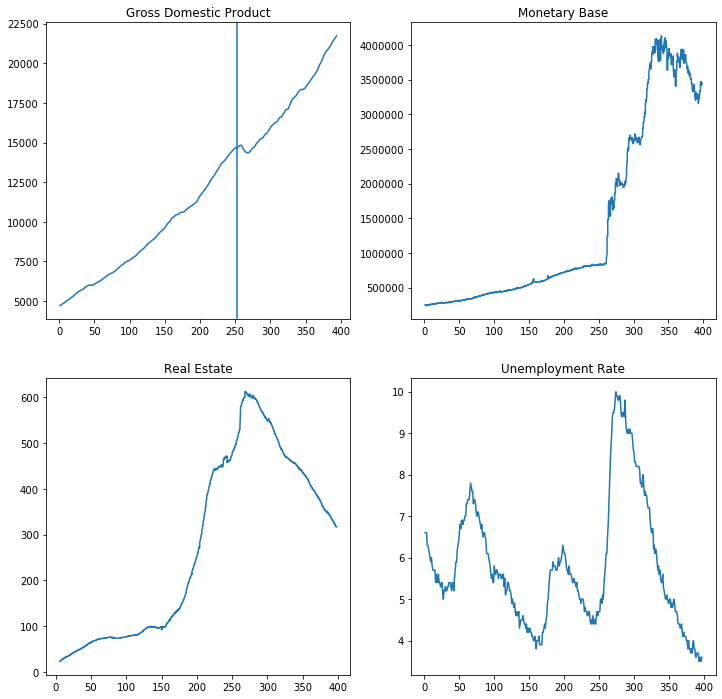

In [141]:
gdp_Y, gdp_X = parse_dates(gdp, 1987)
real_estate_Y, real_estate_X = parse_dates(real_estate, 1987)
monetary_base_Y, monetary_base_X = parse_dates(monetary_base, 1987)
unemploy_Y, unemploy_X = parse_dates(np.array(unemploy), 1987)



fig, axes = plt.subplots(2,2,figsize=[12,12])
axes[0,0].plot(gdp_Y, gdp_X)
axes[0,0].set_title("Gross Domestic Product")
axes[0,0].axvline(x=252)

axes[1,0].plot(real_estate_Y, real_estate_X)
axes[1,0].set_title("Real Estate")

axes[0,1].plot(monetary_base_Y, monetary_base_X)
axes[0,1].set_title("Monetary Base")

axes[1,1].plot(unemploy_Y, unemploy_X)
axes[1,1].set_title("Unemployment Rate")

#fig, ax1,ax2,ax3,ax4 = plt.subplots(nrows=2, ncols=2,figsize=[6,4])

plt.show()

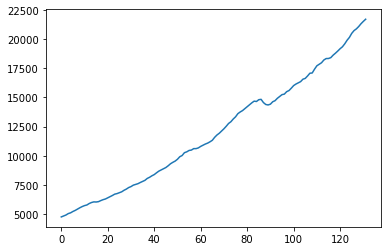

In [83]:
ax1 = plt.plot(parse_dates(gdp, 1987)[:,1])

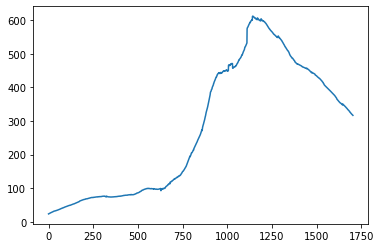

In [85]:
plt.plot(parse_dates(real_estate, 1987)[:,1])

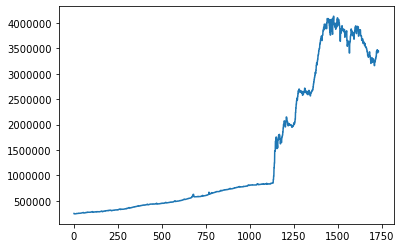

In [86]:
plt.plot(parse_dates(monetary_base, 1987)[:,1])

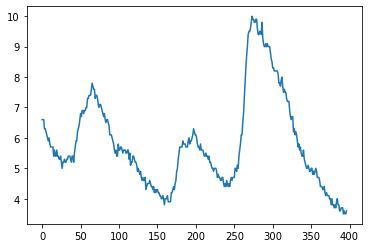

In [91]:
#unemploy
plt.plot(parse_dates(np.array(unemploy), 1987)[:,1])